In [43]:
cd ../testing

/media/genesis/work/valjax/testing


In [44]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('../config/clean.mplstyle')
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

In [69]:
import jax
jax.config.update('jax_platform_name', 'cpu')
import jax.numpy as np
import pandas as pd
import valjax as vj
import valfunc as vf

In [290]:
# algo params
alg0 = {
    'N': 100, # grid size
    'flo': 0.2, # rel k grid min
    'fhi': 1.5, # rel k grid max
    'ε': 1e-4, # utility cutoff
}

In [291]:
# simple parameters
par0 = {
    'β': 0.95, # discount rate
    'δ': 0.1, # depreciation rate
    'α': 0.35, # capital exponent
    'z': 1.0, # productivity
}

In [292]:
mod = vf.Capital(par0, **alg0)

In [293]:
v1, kp1, ret, hist = mod.j_value_solve(K=400)

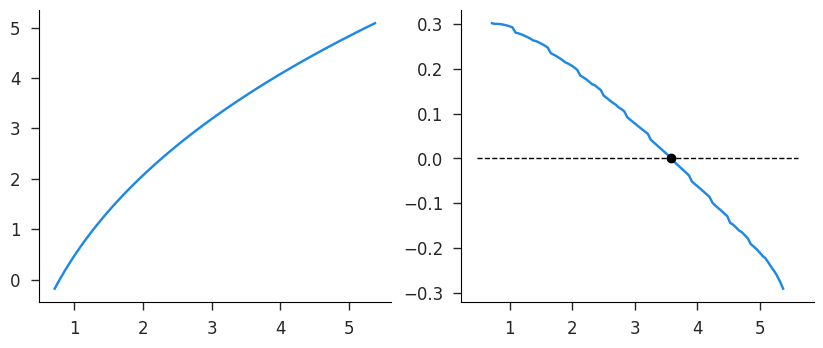

In [294]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
ax0.plot(mod.k_grid, v1)
ax1.plot(mod.k_grid, kp1-mod.k_grid)
ax1.hlines(0, *ax1.get_xlim(), linestyle='--', linewidth=1, color='k');
ax1.scatter(mod.kss, 0, c='k', zorder=10);

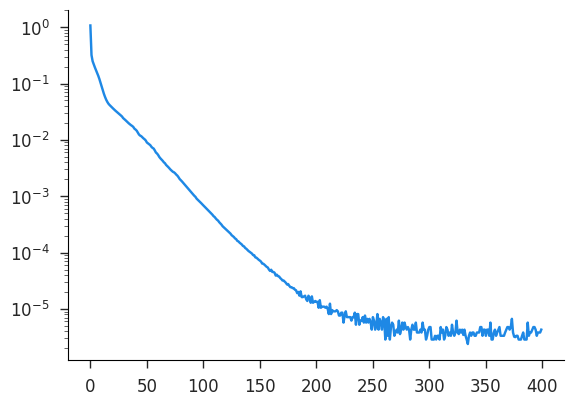

In [274]:
pd.Series(hist['err']).plot(logy=True);

In [303]:
d_cubic = jax.grad(vj.cubic_spline_interp, argnums=0)
vd_cubic = jax.vmap(d_cubic, in_axes=(0, None, None))

In [429]:
x = np.linspace(0, 20, 21)
y = 0.5*x**2

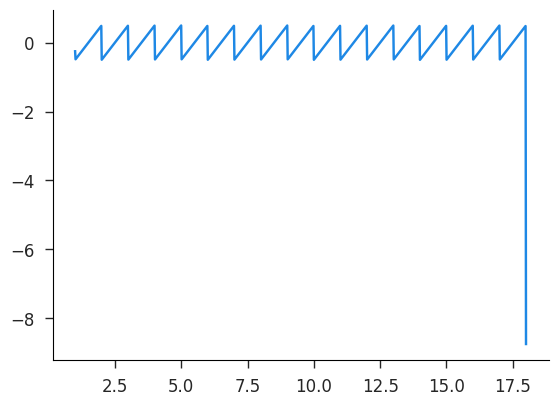

In [434]:
x1 = np.linspace(1, 18, 1000)
y1 = vj.cubic_spline_interp(x1, x, y)
d1 = vd_cubic(x1, x, y)
d0 = x1
plt.plot(x1, d1-d0);

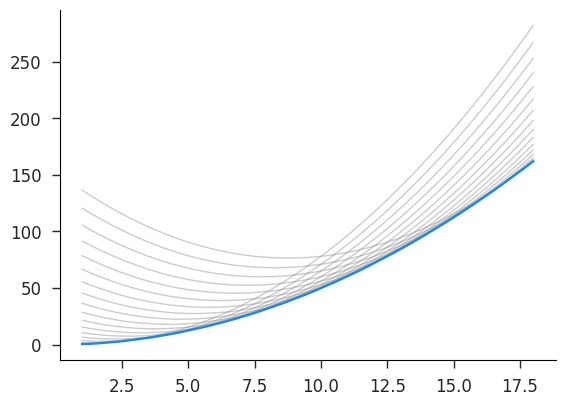

In [435]:
c0, c1, c2, c3 = vj.cubic_spline_fit(x, y)
xlo, xhi = x[:-1], x[1:]
tvec = (x1[None,:]-xlo[:,None])/(xhi[:,None]-xlo[:,None])
pred = c0[:,None] + c1[:,None]*tvec + c2[:,None]*tvec**2 + c3[:,None]*tvec**3
plt.plot(x1, pred[2:18,:].T, c='gray', linewidth=1, alpha=0.4);
plt.plot(x1, y1);

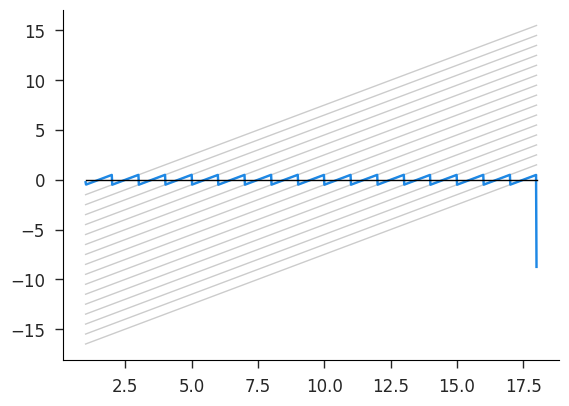

In [436]:
deriv = (c1[:,None] + 2*c2[:,None]*tvec + 3*c3[:,None]*tvec**2)/(xhi[:,None]-xlo[:,None])
plt.plot(x1, deriv[2:18,:].T-d0[:,None], c='gray', linewidth=1, alpha=0.4);
plt.plot(x1, d1-d0);
plt.plot(x1, np.zeros_like(d0), linewidth=1, c='k');

In [437]:
2*c0

DeviceArray([  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81.,
             100., 121., 144., 169., 196., 225., 256., 289., 324., 361.],            dtype=float32)

In [438]:
2*c0/np.arange(20)**2

DeviceArray([nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
              1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)

In [439]:
c1/np.arange(20)

DeviceArray([       inf, 0.5       , 0.75      , 0.8333333 , 0.875     ,
             0.9       , 0.9166667 , 0.9285714 , 0.9375    , 0.9444444 ,
             0.95      , 0.95454544, 0.9583333 , 0.96153843, 0.96428573,
             0.96666664, 0.96875   , 0.9705882 , 0.9722222 , 0.9736842 ],            dtype=float32)

In [441]:
c2

DeviceArray([-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
              1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.], dtype=float32)